## 下载数据
### sklearn加载的数据集有着相似的字典结构：
* DESCR键描述数据集
* data键存放一个数组，数组的一行表示一个样例，一列表示一个特征
* target键存放一个标签数组

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X,y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

### MNIST有70000张图片，每张图片有784个特征，因为每个图片都是28*28像素的

(-0.5, 27.5, 27.5, -0.5)

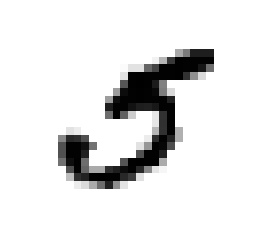

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation='nearest')  # cmap:colormap
plt.axis('off')

In [7]:
y[36000]

5.0

### MNIST 数据集事先已被分成了一个训练集（前60000张图片）和一个测试集（最后10000张图片）

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### 打乱训练集(一些学习算法对训练样例的顺序敏感,当他们在一行当中得到许多相似的样例，算法表现得非常差）

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 训练一个二分类器

In [10]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

### 随机梯度下降分类器SGD，能够高效地处理非常大的数据集，部分原因在于SGD一次只处理一条数据，适合在线学习
### stochastic,依赖于训练集的随机程度，重现结果需要固定参数random_state

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=40)
sgd_clf.fit(X_train, y_train_5)


E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=40, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

## 对性能的评估
### 评估一个分类器通常比评估一个回归器更加玄学

### 1.使用交叉验证测量准确性

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
# 通常精度不是一个好的性能度量指标

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic

array([ 0.95685,  0.9537 ,  0.9608 ])

### 2.混淆矩阵

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# 返回基于每一个测试折做出的一个预测值

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
# 一个完美的分类器只有真反例和真正例，所以混淆矩阵的非零权值仅在其主对角线

array([[53331,  1248],
       [ 1325,  4096]], dtype=int64)

In [16]:
y_train_perfect_predictions = y_train_5

In [17]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### 3.准确率与召回率（F1值）

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # ==3927/(3927+655),声明某张照片是5的时候，百分之85的可能性是正确的

0.76646706586826352

In [19]:
recall_score(y_train_5, y_train_pred)  # ==3927/(3927+1494)，只检测出“是5”类照片中的百分之72

0.75558015126360445

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7609846725499303

### 4.准确率和召回率之间的折衷
#### SGDClassifier对于每一个样例，它根据决策函数计算分数，如果这个分数大于一个阈值，它会将样例分配给正例，否则它将分配给反例

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 7822.55766432])

In [22]:
threshold = 0

In [23]:
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred
# 用了一个等于0的阈值，所以前面的代码返回了跟predict()方法一样的结果（都返回了True）

array([ True], dtype=bool)

In [24]:
threshold = 200000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred
# 证明了提高阈值会降低召回率

array([False], dtype=bool)

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

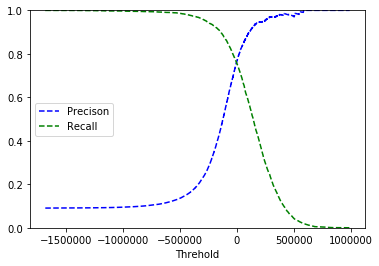

In [27]:
def plot_precision_recall_vs_threhold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precison')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
    plt.xlabel('Threhold')
    plt.legend(loc='center left')
    plt.ylim([0,1])
plot_precision_recall_vs_threhold(precisions, recalls, thresholds)
# 准确率曲线更加起伏不平，召回率曲线更加光滑

Text(0,0.5,'Precision')

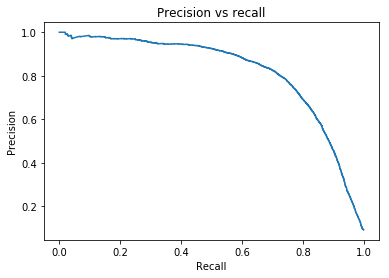

In [28]:
plt.plot(recalls, precisions)
plt.title('Precision vs recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
# 可以看到在召回率在80%的时候，准确率急剧下降

In [29]:
# 只要设置好合适的阈值就可以得到任意准确度的分类器
y_train_pred_90 = (y_scores>70000)

In [30]:
precision_score(y_train_5, y_train_pred_90)

0.86284289276807979

In [31]:
recall_score(y_train_5, y_train_pred_90)

0.63825862387013466

### 5.ROC曲线
#### 受试者工作特征曲线是另一个二分类器常用的工具

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)  # tpr(真正例率)就是召回率

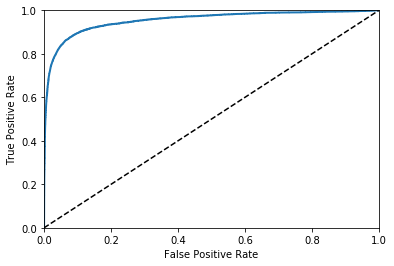

In [33]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
# 可以看到，召回率（TPR）越高，分类器就会产生越多的假正例
# 点线是一个完全随机的分类器生成的ROC曲线，一个好的分类器的ROC曲线应该尽可能远离这条线（即向左上角方向靠拢）

### 一个比较分类器之间优劣的方法：测量ROC曲线下的面积（AUC）
* 一个完美的分类器ROC AUC等于1
* 一个纯随机分类器的ROC AUC等于0.5

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.95447668097082239

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=40)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [36]:
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

E:\Anacond\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


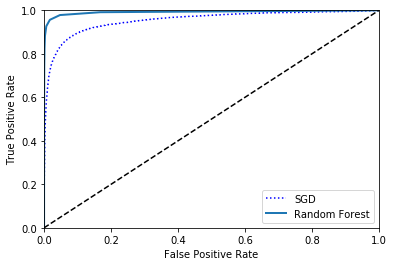

In [37]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, label='Random Forest')
plt.legend(loc='bottom right')

In [38]:
roc_auc_score(y_train_5, y_scores_forest)
# 可以看到RandomForestClassifier的ROC曲线比SGDClassifier的好的多（它更靠近左上角）
# 并且它的ROC AUC也会更大

0.99209533852354426

In [39]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_pred_forest)

0.98435089266034825

In [40]:
recall_score(y_train_5, y_pred_forest)

0.82383324109942813

### 二分类器总结：
* 如何训练一个二分类器
* 选择合适的标准
* 使用交叉验证评估分类器
* 选择满足需要的准确率/召回率折衷方案
* 比较不同模型的ROC曲线和ROC AUC数值

## 多类分类
* 随机森林分类器和朴素贝叶斯分类器可以直接处理多类分类问题
* SVM分类器和线性分类器则是严格的二分类器
* 有许多策略可以让你用二分类器去执行多类分类
    1.OvA（一对所有，其他大部分分类器）
    2.OvO（一对一，SVM）

In [41]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])
# 在幕后，SGD实际上训练了10个二分类器，每个二分类器都产生一张图片的决策数值，选择数值最高的那个方案

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 5.])

In [42]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-192725.97112442, -367111.42371365, -289573.99151561,
        -177880.59007805, -415243.29998211,    7822.55766432,
        -748965.86525734, -423254.42350155, -647952.65415691,
        -614568.27476783]])

In [43]:
np.argmax(some_digit_scores)

5

In [44]:
sgd_clf.classes_
# 一个分类器训练好了以后，它会保存目标类别列表到它的属性classes_中去，按照值排序

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [45]:
sgd_clf.classes_[5]

5.0

#### 使用OvO策略，基于SGDClassifier

In [46]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=40))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic

array([ 5.])

In [47]:
len(ovo_clf.estimators_)  # N*(N-1)/2 = 10*(10-1)/2

45

In [48]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])
# 这次没有必要调用OvO或者OvA，因为随机森林分类器可以直接将一个样例分到多个类别

array([ 5.])

In [49]:
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [50]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic

array([ 0.87312537,  0.87029351,  0.87583137])

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic

array([ 0.90926815,  0.91074554,  0.90803621])

In [52]:
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
# 经过简单的正则化以后，精度显著提高，并且随机森林分类器的精度比随机梯度下降高

array([ 0.94056189,  0.94354718,  0.93919088])

## 误差分析
#### 1. 检查混淆矩阵

In [53]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic

array([[5732,    2,   24,   10,   12,   42,   45,   12,   39,    5],
       [   2, 6490,   43,   23,    5,   46,    7,   11,  103,   12],
       [  53,   43, 5343,   97,   80,   23,   93,   59,  154,   13],
       [  47,   38,  134, 5322,    3,  252,   37,   58,  137,  103],
       [  14,   25,   46,    8, 5318,   10,   54,   31,   91,  245],
       [  72,   44,   31,  185,   72, 4607,  118,   28,  162,  102],
       [  33,   21,   46,    2,   48,   89, 5635,    4,   39,    1],
       [  23,   19,   69,   28,   56,    9,    6, 5808,   13,  234],
       [  51,  145,   80,  147,   11,  162,   62,   27, 5007,  159],
       [  38,   30,   26,   85,  151,   33,    2,  201,   84, 5299]], dtype=int64)

#### 2.将混淆矩阵以图像的方式呈现
* 这个混淆矩阵看起来相当好，因为大多数图片在主对角线上，意味着被分类正确
* 数字5对应的格子看起来比其他数字要暗淡许多
    * 可能是数据集当中数字5的图片比较少
    * 也可能是分类器对于数字5的表现不如其他数字那么好

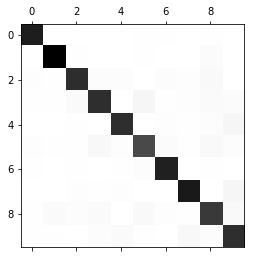

In [54]:
plt.matshow(conf_mx, cmap=plt.cm.gray_r)

In [55]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
# 将混淆矩阵的每一个值除以相应类别的图片的总数目，比较错误率

In [56]:
norm_conf_mx

array([[  9.67752828e-01,   3.37666723e-04,   4.05200068e-03,
          1.68833361e-03,   2.02600034e-03,   7.09100118e-03,
          7.59750127e-03,   2.02600034e-03,   6.58450110e-03,
          8.44166807e-04],
       [  2.96647879e-04,   9.62622367e-01,   6.37792940e-03,
          3.41145061e-03,   7.41619697e-04,   6.82290122e-03,
          1.03826758e-03,   1.63156333e-03,   1.52773658e-02,
          1.77988727e-03],
       [  8.89560255e-03,   7.21718698e-03,   8.96777442e-01,
          1.62806311e-02,   1.34273246e-02,   3.86035582e-03,
          1.56092649e-02,   9.90265190e-03,   2.58475999e-02,
          2.18194025e-03],
       [  7.66595988e-03,   6.19801011e-03,   2.18561409e-02,
          8.68047627e-01,   4.89316588e-04,   4.11025934e-02,
          6.03490458e-03,   9.46012070e-03,   2.23454575e-02,
          1.67998695e-02],
       [  2.39643958e-03,   4.27935638e-03,   7.87401575e-03,
          1.36939404e-03,   9.10304690e-01,   1.71174255e-03,
          9.24340979e-03

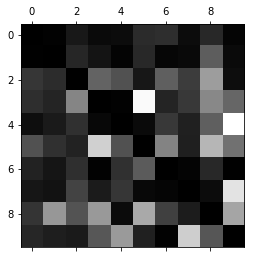

In [57]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

* 第8，9列相当亮，许多图片被误分成数字8或9
* 第8，9行也相当亮，数字8和9经常被误以为是其他数字
* 数字3和5的混淆

In [58]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

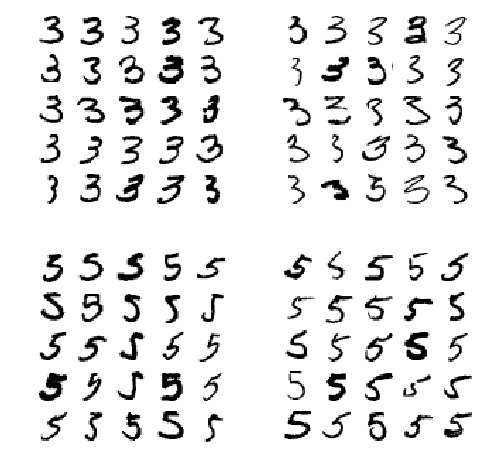

In [59]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred==cl_b)]
plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)

#### SGDClassifier是一个线性模型，他所做的全部工作就是分配一个权重给每个像素，然后当它看到一张新的图片，它就将加权的像素强度相加，每个类得到一个新的值，如果3和5有细小的像素差异，这个模型很容易混淆它们
#### 这个分类器对图片的位移和旋转相当敏感，减轻3/5混淆的一个方法是对图片进行预处理，确保它们都很好地中心化和不过度旋转

## 多标签分类
### 输出多个二值标签的分类系统被叫做多标签分类系统

In [61]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

* 第一个标签指出这个数字是否为大数字（7， 8或9）
* 第二个标签指出这个数字是否是奇数

In [62]:
knn_clf.predict([some_digit])  # 5不是大数字，是奇数

array([[False,  True]], dtype=bool)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
# 据说非常慢，要23小时

In [ ]:
f1_score(y_train, y_train_knn_pred, average='macro')

#### 这里假设所有标签有着相同的重要性，也可以给每个标签的权重等于它的支持度（比如，那个标签的样例的数目）

In [ ]:
f1_score(y_train, y_multilabel, average='weighted')

## 多输出分类
#### 将一张混有噪音的图片作为输出，输出一张干净的数字图片，用一个像素强度的数组表示
#### 这个分类器的输出是多标签（一个像素一个标签）和每个标签可以有多个值（像素强度取值范围从0到255）
#### 注意到：多标签分类是指输出多个 ** 二值 ** 标签

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()